In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#讀入Tensorflow

In [3]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD
#互動設計用
from ipywidgets import interact_manual

In [6]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [7]:
#看數據及內容

In [8]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [10]:
n=9487

In [11]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,  79, 116,  76,
         28,  61, 116, 123,  52,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  87, 174, 166, 178,
        107, 150, 150, 167, 157,  20,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 130, 148, 151,
         84, 131, 159, 134, 123,  21,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  97, 120, 111, 139,
        163, 155, 111, 110, 139,  28,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  99, 126, 112,  99,
         97, 103, 108, 107, 139,  32,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 106, 119, 104, 102,
        111, 110, 103,  96, 136,  36,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [12]:
y_train[9487]

0

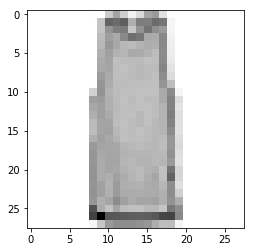

In [13]:
plt.imshow(x_train[n],cmap='Greys') #image show / color map 灰階

In [14]:
###3. 資料整理

In [15]:
np.array([3,78,95,99])/100 #正規化

array([ 0.03,  0.78,  0.95,  0.99])

In [16]:
x_train=x_train/255
x_test=x_test/255

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
28*28

784

In [19]:
x_train=x_train.reshape(60000,784)

In [20]:
x_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [21]:
x_test=x_test.reshape(len(x_test),784)

In [22]:
from tensorflow.keras.utils import to_categorical #把一個數字變成一條陣列

In [23]:
y_train=to_categorical(y_train,10)

In [24]:
y_test=to_categorical(y_test,10)

In [25]:
y_train[n]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

In [26]:
###打造神經網路

In [27]:
from tensorflow.keras.models import Sequential #模型
from tensorflow.keras.layers import Dense # RNN CNN種類（層）
from tensorflow.keras.optimizers import SGD #優化

In [28]:
#開一台空白的學習機 model是名字
model=Sequential()

In [29]:
model.add(Dense(200,input_dim=784,activation='relu')) #神經元數量 dimention數量

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(200,activation='relu'))

In [31]:
model.add(Dense(10,activation='softmax')) #十個輸出,softmax是加起來等於一

In [32]:
### 組裝神經網路

In [33]:
model.compile(loss='mse',optimizer=SGD(lr=0.05),metrics=['accuracy'])
#mse誤差做平均,lr->learning rate

Instructions for updating:
Use tf.cast instead.


In [34]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2010      
Total params: 319,810
Trainable params: 319,810
Non-trainable params: 0
_________________________________________________________________


In [35]:
784*87+87 #87個偏值

68295

In [36]:
### 訓練

In [37]:
model.fit(x_train,y_train,batch_size=50,epochs=20)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0809 - acc: 0.4104
Epoch 2/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0447 - acc: 0.6858
Epoch 3/20
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0338 - acc: 0.7757
Epoch 4/20
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0290 - acc: 0.8069
Epoch 5/20
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0266 - acc: 0.8198
Epoch 6/20
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0251 - acc: 0.8282
Epoch 7/20
60000/60000 [==============================] - 8s 138us/sample - loss: 0.0240 - acc: 0.8368
Epoch 8/20
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0232 - acc: 0.8412
Epoch 9/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0226 - acc: 0.8467
Epoch 10/20
60000/60000 [

In [38]:
#訓練成果

In [39]:
score = model.evaluate(x_test, y_test)
result=model.predict_classes(x_test)

10000/10000 [==============================] - 1s 73us/sample - loss: 0.0210 - acc: 0.8547


神經網路預測是： 外套 , 正確答案： 褲子


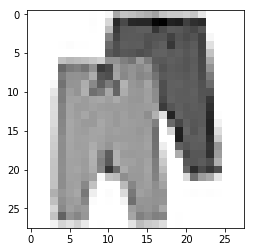

In [40]:
n=9485
list=['T恤/上衣','褲子','套頭毛衣','洋裝','外套','涼鞋','襯衫','布鞋','包包','靴子']
for i in range(0,9):
    if y_test[n][i]!=0:
        a=i

print('神經網路預測是：',list[result[n]],', 正確答案：',list[a])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

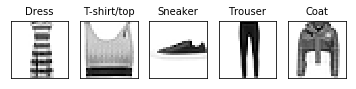

In [54]:
%matplotlib inline
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import numpy as np
import matplotlib.pyplot as plt
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    for j in range(0,9):
        if y_train[n][j]!=0:
            a=j
    ax.set_title(class_names[a], fontsize=10)
    plt.imshow(x_train[n].reshape(28,28), cmap='Greys')  


In [ ]:
#改變的地方：神經元數量、層數、學習率、batch_size